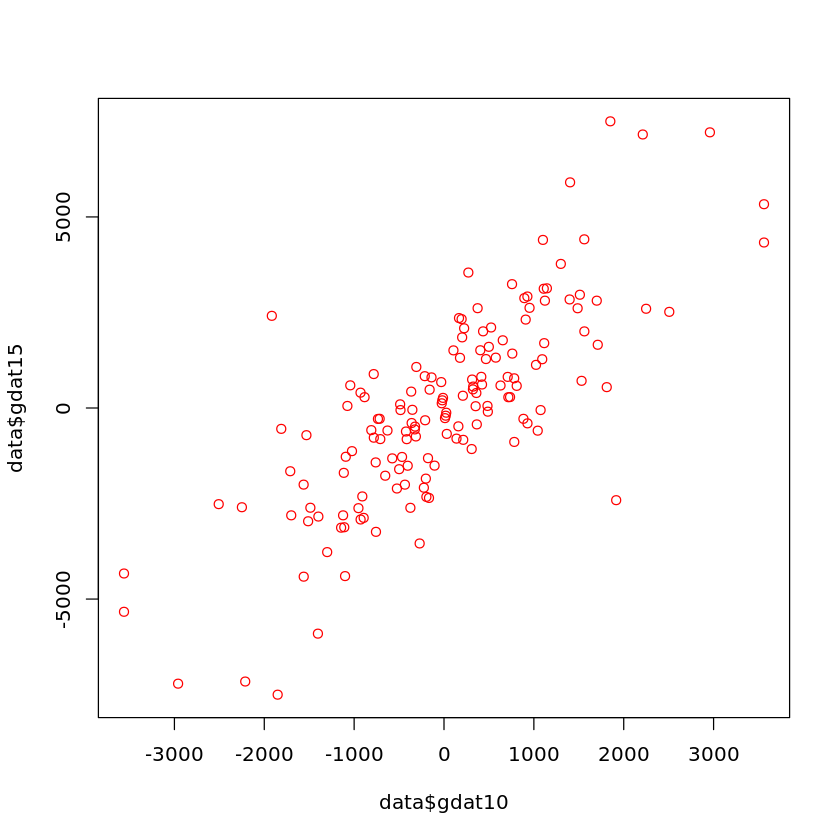

In [27]:
data=read.csv("data_team.csv")
plot(data$gdat10,data$gdat15,col=rgb(1,0,0))

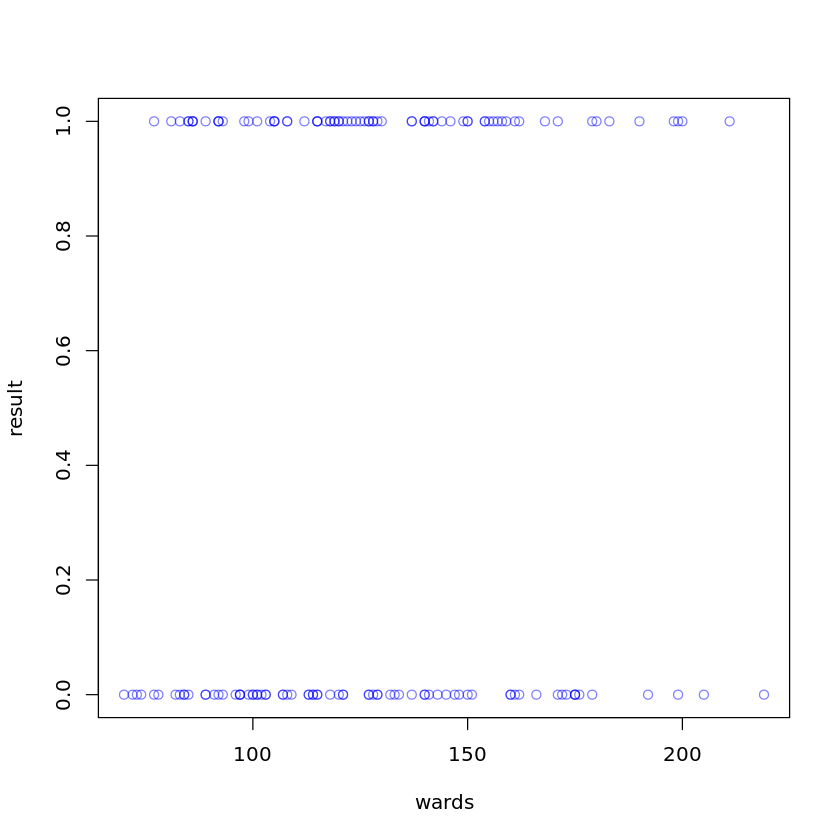

In [28]:
plot(data$wards,data$result,xlab="wards",ylab="result",col=rgb(0,0,1,0.5))

In [33]:
wardsfit<-glm(result~wards,data=data,family=binomial)
summary(wardsfit)

idx<-sample(nrow(data), floor(nrow(data) * 0.5))
data_1 = data[idx,]
data_2 = data[-idx,]


Call:
glm(formula = result ~ wards, family = binomial, data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.36271  -1.15753  -0.02453   1.17961   1.27825  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.591680   0.635319  -0.931    0.352
wards        0.004646   0.004827   0.963    0.336

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 213.49  on 153  degrees of freedom
Residual deviance: 212.56  on 152  degrees of freedom
AIC: 216.56

Number of Fisher Scoring iterations: 3


    
pred  0  1
   0 44 41
   1 33 36

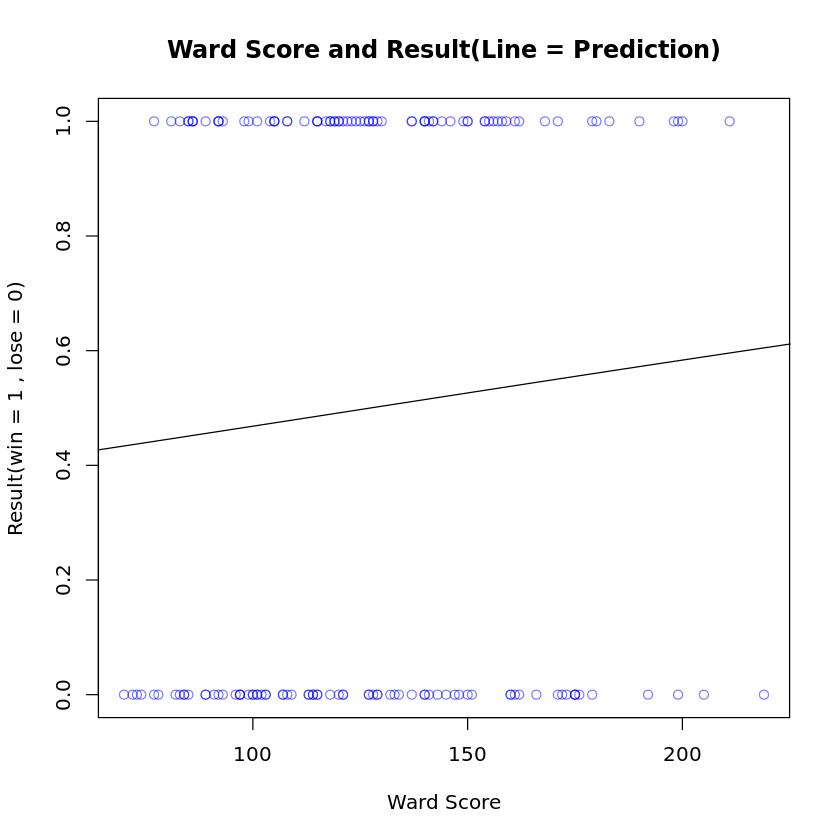

In [66]:
wardsfit<-glm(result~wards,data=data,family=binomial)
newamh<-seq(50,250)
predprobs<-predict(wardsfit,data.frame(wards=newamh),type="response")
plot(data$wards,data$result,main ="Ward Score and Result(Line = Prediction)", xlab="Ward Score",ylab="Result(win = 1 , lose = 0)",col=rgb(0,0,1,0.5))
lines(newamh,predprobs,col="black",lty=1)
pred <-as.integer(predict(wardsfit, data, type="response") >= 0.5)
table(pred,data$result)

In [55]:
wardsfit_f1 <- glm(result~wards,data=data_1,family=binomial)
wardsfit_f2 <- glm(result~wards,data=data_2,family=binomial)

pred1 <-as.integer(predict(wardsfit_f2, data_1, type="response") >= 0.5)
pred2 <-as.integer(predict(wardsfit_f1, data_2, type="response") >= 0.5)

table(pred1,data_1$result)
table(pred2,data_2$result)
cat('2-fold CV error is ', 0.5*(mean(pred1 != data_1$result) + mean(pred2 != data_2$result)),'\n')

     
pred1  0  1
    0 18 11
    1 22 26

     
pred2  0  1
    0 24 27
    1 13 13

2-fold CV error is  0.474026 


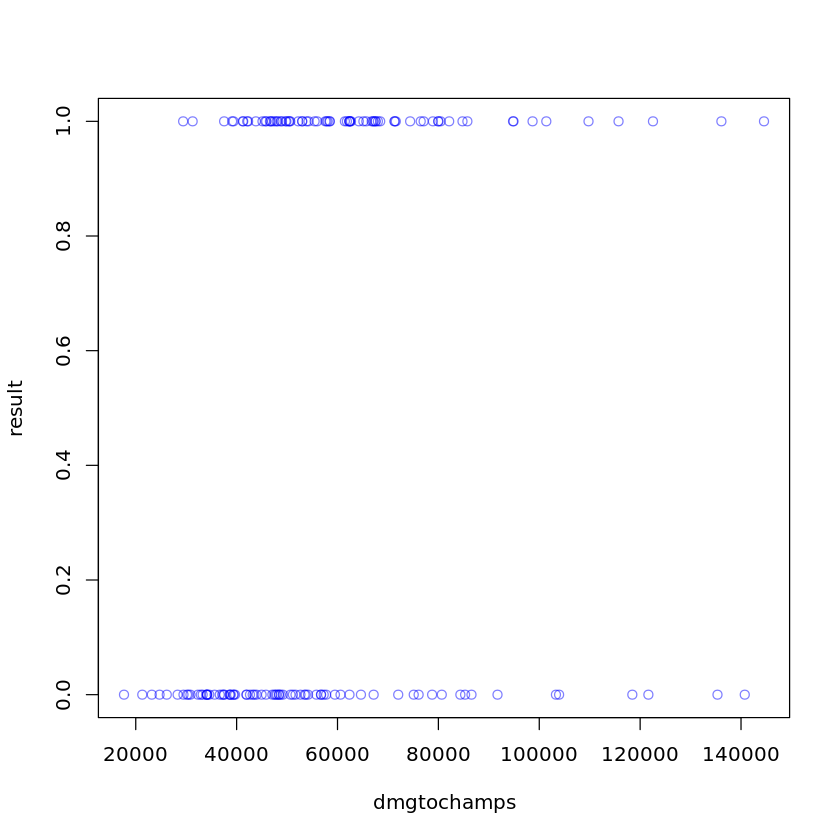

In [30]:
plot(data$dmgtochamps,data$result,xlab="dmgtochamps",ylab="result",col=rgb(0,0,1,0.5))


Call:
glm(formula = result ~ wards, family = binomial, data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.36271  -1.15753  -0.02453   1.17961   1.27825  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.591680   0.635319  -0.931    0.352
wards        0.004646   0.004827   0.963    0.336

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 213.49  on 153  degrees of freedom
Residual deviance: 212.56  on 152  degrees of freedom
AIC: 216.56

Number of Fisher Scoring iterations: 3


    
pred  0  1
   0 57 36
   1 20 41

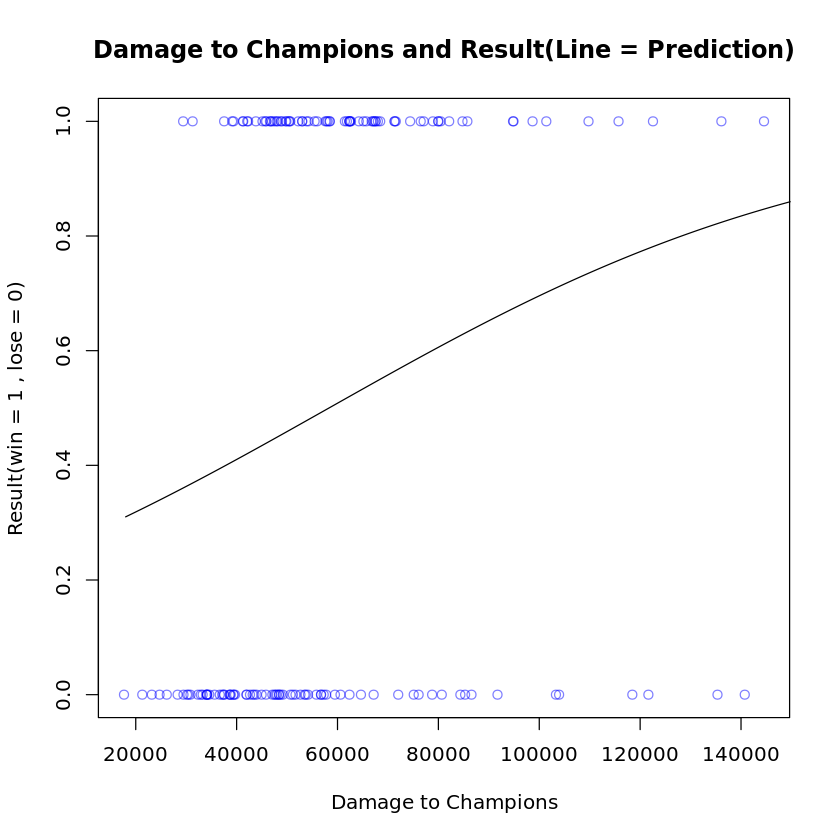

In [68]:
dmgtochampsfit<-glm(result~dmgtochamps,data=data,family=binomial)
summary(wardsfit)
newamh<-seq(18000,150000)
predprobs<-predict(dmgtochampsfit,data.frame(dmgtochamps=newamh),type="response")
plot(data$dmgtochamps,data$result,,main ="Damage to Champions and Result(Line = Prediction)", xlab="Damage to Champions",ylab="Result(win = 1 , lose = 0)",col=rgb(0,0,1,0.5))
lines(newamh,predprobs,col="black",lty=1)
pred <-as.integer(predict(dmgtochampsfit, data, type="response") >= 0.5)
table(pred,data$result)

In [41]:
fit_f1 <- glm(result~dmgtochamps,data=data_1,family=binomial)
fit_f2 <- glm(result~dmgtochamps,data=data_2,family=binomial)

pred1 <-as.integer(predict(fit_f2, data_1, type="response") >= 0.5)
pred2 <-as.integer(predict(fit_f1, data_2, type="response") >= 0.5)

cat('2-fold CV error is ', 0.5*(mean(pred1 != data_1$result) + mean(pred2 != data_2$result)),'\n')

2-fold CV error is  0.3506494 


    
pred  0  1
   0 54 23
   1 23 54

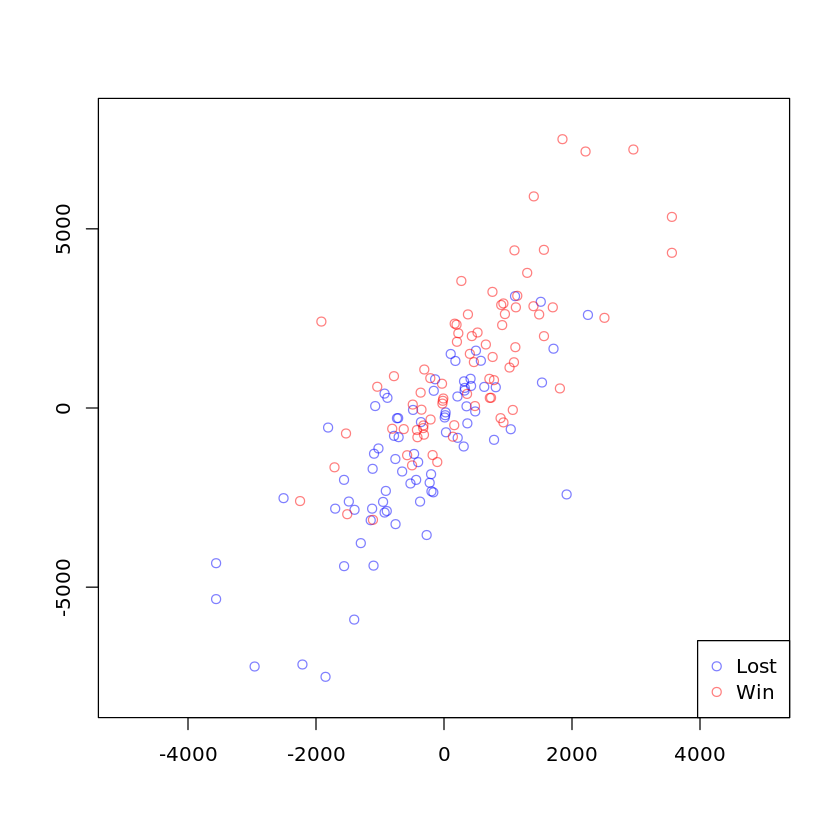

In [75]:
plot(data$gdat10[data$result==0],data$gdat15[data$result==0],main="",xlim=c(-5000,5000),ylim=c(-8000,8000), xlab="",ylab="",col=rgb(0,0,1,0.5))
points(data$gdat10[data$result==1],data$gdat15[data$result==1],col=rgb(1,0,0,0.5))
legend("bottomright", c("Lost","Win"),pch=c(1,1),col=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5)))
fit <- glm(result~gdat15,data=data,family=binomial)
pred <-as.integer(predict(fit, data, type="response") >= 0.5)
table(pred,data$result)

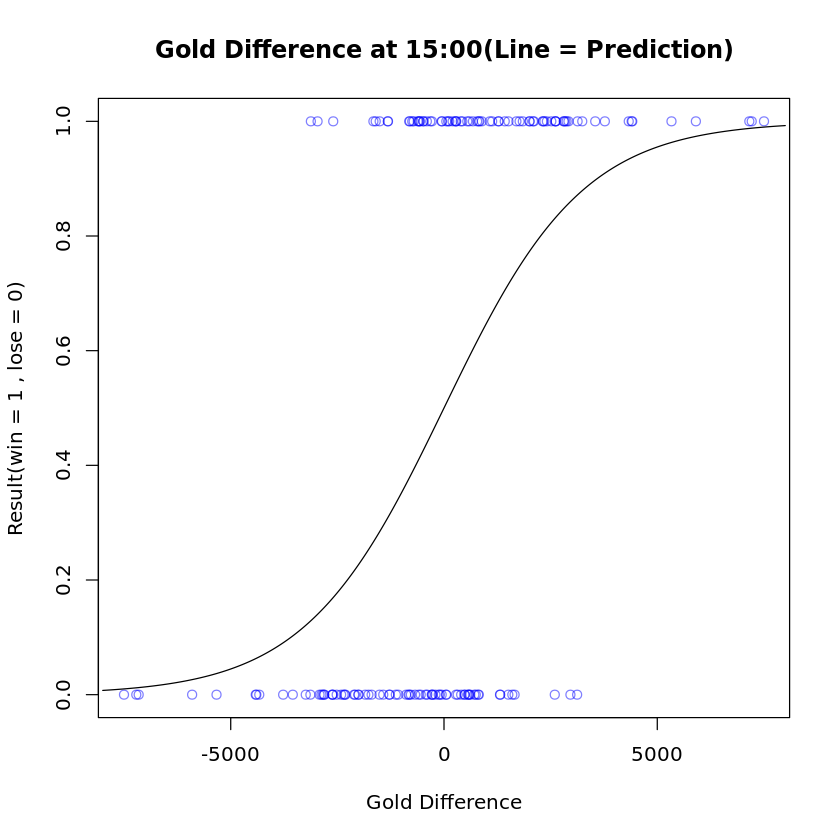

In [72]:
fit <- glm(result~gdat15,data=data,family=binomial)
newamh<-seq(-8000,8000)
predprobs<-predict(fit,data.frame(gdat15=newamh),type="response")
plot(data$gdat15,data$result,main ="Gold Difference at 15:00(Line = Prediction)", xlab="Gold Difference",ylab="Result(win = 1 , lose = 0)",col=rgb(0,0,1,0.5))
lines(newamh,predprobs,col="black",lty=1)

In [74]:
fit_f1 <- glm(result~gdat15*gdat10,data=data_1,family=binomial)
fit_f2 <- glm(result~gdat15*gdat10,data=data_2,family=binomial)

pred1 <-as.integer(predict(fit_f2, data_1, type="response") >= 0.5)
pred2 <-as.integer(predict(fit_f1, data_2, type="response") >= 0.5)

table(pred1,data_1$result)
table(pred2,data_2$result)
cat('2-fold CV error is ', 0.5*(mean(pred1 == data_1$result) + mean(pred2 == data_2$result)),'\n')

     
pred1  0  1
    0 28 13
    1 12 24

     
pred2  0  1
    0 26 12
    1 11 28

2-fold CV error is  0.6883117 


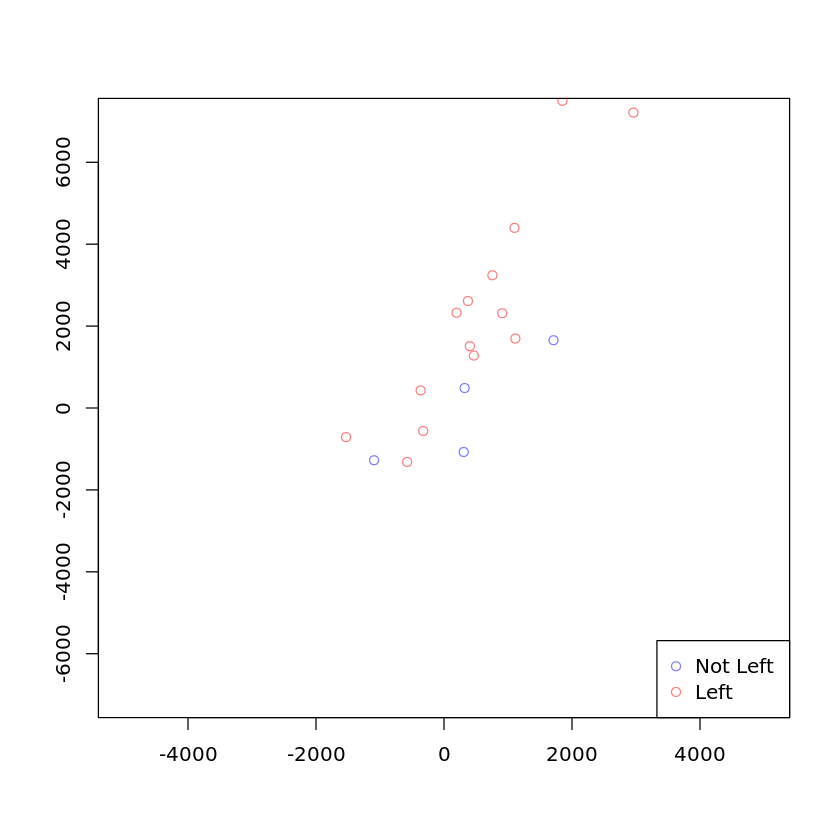

In [18]:
plot(data$gdat10[data$result==0&data$team=="Funplus Phoenix"],data$gdat15[data$result==0&data$team=="Funplus Phoenix"],main="",xlim=c(-5000,5000),ylim=c(-7000,7000), xlab="",ylab="",col=rgb(0,0,1,0.5))
points(data$gdat10[data$result==1&data$team=="Funplus Phoenix"],data$gdat15[data$result==1&data$team=="Funplus Phoenix"],col=rgb(1,0,0,0.5))
legend("bottomright", c("Not Left","Left"),pch=c(1,1),col=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5)))

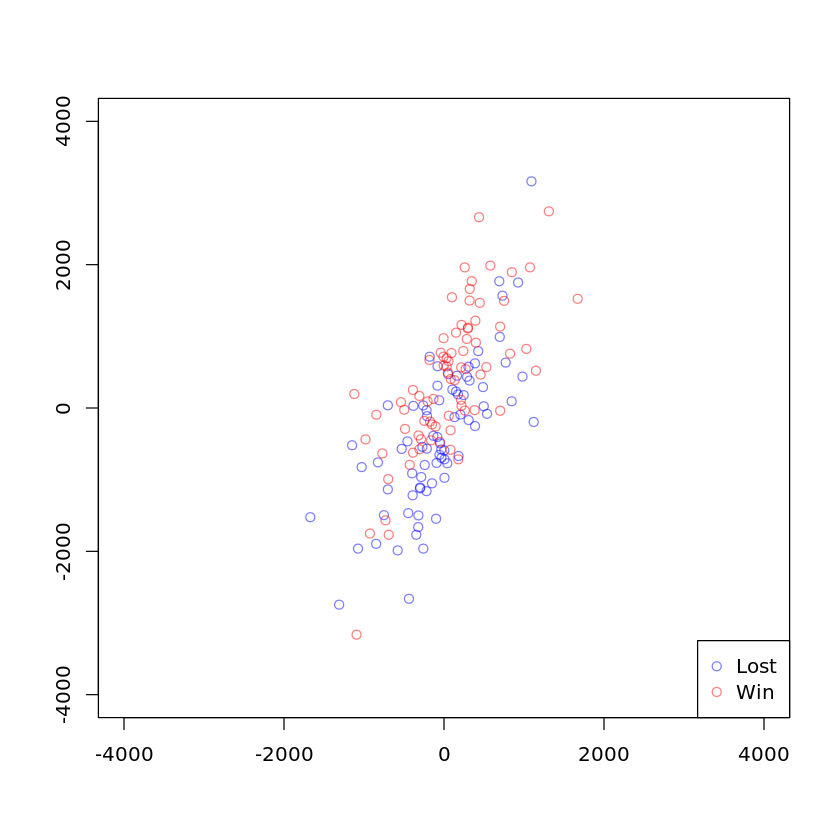

In [22]:
data=read.csv("data_clean.csv")
plot(data$gdat10[data$result==0&data$position=="ADC"],data$gdat15[data$result==0&data$position=="ADC"],main="",xlim=c(-4000,4000),ylim=c(-4000,4000), xlab="",ylab="",col=rgb(0,0,1,0.5))
points(data$gdat10[data$result==1&data$position=="ADC"],data$gdat15[data$result==1&data$position=="ADC"],col=rgb(1,0,0,0.5))
legend("bottomright", c("Lost","Win"),pch=c(1,1),col=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5)))